In [1]:
import pylab
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = 'data/first_samples/projet_ML_branch/labels_NW_727_1_1'
file = 'data/first_samples/normalized/labels_NW_727_1_1'
file = 'data/second_samples/normalized/train/labels_NW_319_test_1_2_win_2'
file = 'data/second_samples/normalized/train/labels_NW_319_test_1_2_win_3'
pylab.rcParams['figure.figsize'] = (12, 5)

#df = pd.read_csv(file, sep='\t')
df = pd.read_csv(file)
print(df.columns)
df.head()

Index(['node_number', 'parent_node_number', 'var_cost', 'frac_val',
       'fraction_conflicting_columns',
       'fraction_conflicting_columns_positive_value',
       'min_cost_conflicting_column',
       'min_cost_conflicting_column_positive_value', 'number_cols_in_mp',
       'dual_cost_min', 'dual_cost_max', 'dual_cost_avg',
       'frac_pairing_tasks_fixed', 'nb_pairing_tasks', 'value'],
      dtype='object')


,node_number,parent_node_number,var_cost,frac_val,fraction_conflicting_columns,fraction_conflicting_columns_positive_value,min_cost_conflicting_column,min_cost_conflicting_column_positive_value,number_cols_in_mp,dual_cost_min,dual_cost_max,dual_cost_avg,frac_pairing_tasks_fixed,nb_pairing_tasks,value
0,1,0,-1.302312,0.985425,0.003767,0.000070,-1.433629,-1.304982,1.174764,0.748733,-1.429213,-0.359675,0.427115,-1.221345,0.046033
1,2,0,-1.353461,0.948426,0.006654,0.000070,-1.356235,-1.356235,1.174764,0.748733,-0.451969,-0.547714,0.427115,-1.221345,0.011431
2,3,0,-0.109518,0.948220,0.025595,0.000141,-1.442342,-0.109743,1.174764,-0.957945,0.216687,-0.282901,0.427115,-0.172952,0.001585
3,4,0,0.234203,0.945721,0.015209,0.000141,-1.026161,0.232633,1.174764,-1.202273,1.212961,1.738005,0.427115,-0.435050,0.000737
4,5,0,-1.353461,0.938084,0.005140,0.000070,-1.356235,-1.356235,1.174764,0.662751,0.451534,-0.547714,0.427115,-1.221345,0.000135


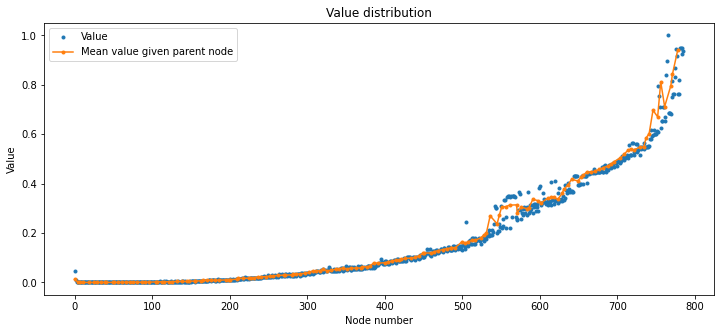

In [2]:
X = df['node_number'].values
Y = df['value'].values
plt.plot(X, Y, '.', label='Value')

df_temp = df[['parent_node_number', 'value']].groupby('parent_node_number').mean()
X, Y = df_temp.index, df_temp['value']
plt.plot(X, Y, '.-', label='Mean value given parent node')

plt.xlabel('Node number')
plt.ylabel('Value')
plt.title('Value distribution')
plt.legend()

plt.show()

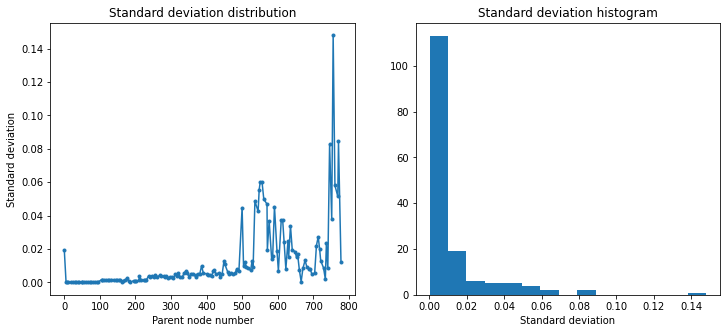

Min: 0.00	Max: 0.15
Mean: 0.01	25%: 0.00	75%: 0.01


In [3]:
df_temp = df[['parent_node_number', 'value']].groupby('parent_node_number')
Y = df_temp.std()['value']
X = df_temp.std().index

plt.subplot(1, 2, 1)
plt.plot(X, Y, '.-', label='Std given a parent node')
plt.title('Standard deviation distribution')
plt.xlabel('Parent node number')
plt.ylabel('Standard deviation')

plt.subplot(1, 2, 2)
plt.hist(Y, bins=15)
plt.title('Standard deviation histogram')
plt.xlabel('Standard deviation')

plt.show()

print(f'Min: {min(Y):.2f}\tMax: {max(Y):.2f}')
q = np.quantile(Y, [0.25, 0.5, 0.75])
print(f'Mean: {q[1]:.2f}\t25%: {q[0]:.2f}\t75%: {q[2]:.2f}')

# TODO
* Nombre de noeuds enfants qui ont la même valeur maximale
* Histogramme des écarts entre le meilleur enfant et le 2eme meilleur (lorsqu'il y a une différence)
* Histogramme des écarts entre le meilleur enfant et le pire (lorsqu'il y a une différence)

In [4]:
%%time

import os

import pylab
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sb_utils.read_data import get_trees

path = 'data/second_samples/normalized/train/'
trees = get_trees(path)
total_len = sum([len(t) for t in trees.values()])
print(f'Number of parents: {total_len:,}')

Number of parents: 27,873
Wall time: 1min 3s


In [15]:
def count_equals(tree):
    total = []
    for parent_node in tree.values():
        max_v = max(c.value for c in parent_node.children_nodes)
        total.append(len([c for c in parent_node.children_nodes
                          if c.value == max_v]))
    return total

total_count = {i: 0 for i in range(1, 6)}
for t in trees.values():
    for v in count_equals(t):
        total_count[v] += 1
print(total_count)

total_maximal_childs = sum(sum(count_equals(t)) for t in trees.values())
print(f'Total maximal childs: {total_maximal_childs:,}')
dupp = (total_maximal_childs - total_len) / total_len
print(f'% of dupplicates: {dupp * 100:.1f}%')

{1: 27371, 2: 334, 3: 81, 4: 49, 5: 38}
Total maximal childs: 28,668
% of dupplicates: 2.9%


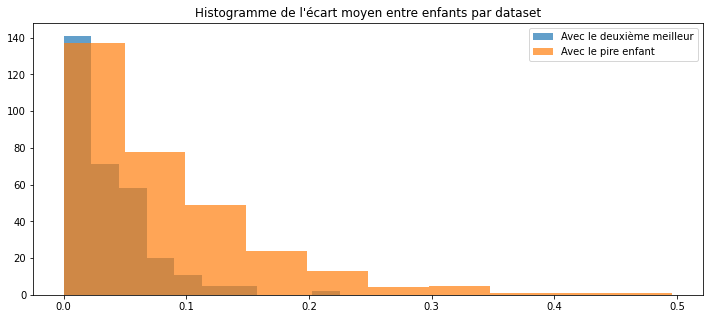

Pour les écarts avec le deuxième meilleur:
Moyenne: 0.0183
Deviation: 0.0563
Minimum (après 0): 4.41e-16
Maximum: 0.9786
Quantile 10%: 8.28e-05

Pour les écarts avec le plus mauvais:
Moyenne: 0.0412
Deviation: 0.0903
Minimum (après 0): 4.41e-16
Maximum: 0.9787
Quantile 10%: 1.09e-03


In [33]:
def ecart_2nd(tree):
    ecarts = []
    for parent_node in tree.values():
        max_v = max(c.value for c in parent_node.children_nodes)
        others = [c.value for c in parent_node.children_nodes
                  if c.value != max_v]
        others_v = max(others) if others else max_v
        ecarts.append(max_v - others_v)
    return ecarts

def ecart_worst(tree):
    ecarts = []
    for parent_node in tree.values():
        max_v = max(c.value for c in parent_node.children_nodes)
        min_v = min(c.value for c in parent_node.children_nodes)
        ecarts.append(max_v - min_v)
    
    return ecarts

def get_stats(ecarts):
    mean = np.mean(ecarts)
    std = np.std(ecarts)
    mini = min(e for e in ecarts if e != 0)
    maxi = max(ecarts)
    ten_prct = np.quantile([e for e in ecarts if e != 0], 0.10)
    
    print(f'Moyenne: {mean:.4f}')
    print(f'Deviation: {std:.4f}')
    print(f'Minimum (après 0): {mini:.2e}')
    print(f'Maximum: {maxi:.4f}')
    print(f'Quantile 10%: {ten_prct:.2e}')

mean_ecarts = [ecart_2nd(t) for t in trees.values()]
mean_ecarts = [sum(e) / len(e) for e in mean_ecarts]
plt.hist(mean_ecarts, bins=10, label='Avec le deuxième meilleur', alpha=0.7)

mean_ecarts = [ecart_worst(t) for t in trees.values()]
mean_ecarts = [sum(e) / len(e) for e in mean_ecarts]
plt.hist(mean_ecarts, bins=10, label='Avec le pire enfant', alpha=0.7)

plt.title('Histogramme de l\'écart moyen entre enfants par dataset')
plt.legend()
plt.show()


ecarts = []
for t in trees.values():
    ecarts.extend(ecart_2nd(t))
print('Pour les écarts avec le deuxième meilleur:')
get_stats(ecarts)

ecarts = []
for t in trees.values():
    ecarts.extend(ecart_worst(t))
print('\nPour les écarts avec le plus mauvais:')
get_stats(ecarts)